In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency 

# --- 1. Global Style Configuration ---
sns.set_style("whitegrid")

# Global Matplotlib configurations
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 12

# --- Color Definitions and Palettes ---
COMPARISON_PALETTE = ["#CC3333", "#6699CC"] # Red (Yes CVD) and Blue (No CVD)
PALETTES_CORRELATION = {
    'INCOME3': "Greens_d",
    '_SMOKER3': "Purples_d",
    'SEXVAR': "Set1",
    'GENHLTH': "Blues_d"
}
LINE_COLOR = "#FF4500" 

# --- Columns and Feature Mappings ---

# Feature lists updated with proxies (INCOME3, EDUCA) for missing key health factors
VARS_TO_PLOT = ['INCOME3', 'EDUCA', '_RFDRHV8', '_SMOKER3', '_BMI5CAT', 'DIABETE4']
ECV_VARS = ['INCOME3', '_SMOKER3', 'SEXVAR', 'GENHLTH']
MATRIX_FEATURES = [
    'INCOME3', 'EDUCA', 'DIABETE4', '_SMOKER3', '_BMI5CAT', 
    '_RFDRHV8', 'GENHLTH', '_AGEG5YR', 'SEXVAR', 'TARGET'
]

# Descriptive Label Mapping (English)
EN_LABEL_MAP = {
    'INCOME3': 'Income Level',
    'EDUCA': 'Education Level',
    'DIABETE4': 'Diabetes Status',
    '_SMOKER3': 'Smoking Status',
    '_BMI5CAT': 'BMI Category',
    '_RFDRHV8': 'Heavy Drinking',
    'GENHLTH': 'General Health',
    'SEXVAR': 'Sex',
    '_AGEG5YR': 'Age Group',
    'TARGET': 'CVD Presence' 
}

# Age Group Mapping (for Plot 11)
AGE_GROUP_MAP = {
    1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44', 
    6: '45-49', 7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69', 
    11: '70-74', 12: '75-79', 13: '80+'
}

In [41]:
df = pd.read_csv("train.csv", usecols=ALL_COLUMNS)
print(list(df.columns))

['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE', 'SEQNO', '_PSU', 'CTELENM1', 'PVTRESD1', 'COLGHOUS', 'STATERE1', 'CELPHON1', 'LADULT1', 'COLGSEX1', 'NUMADULT', 'LANDSEX1', 'NUMMEN', 'NUMWOMEN', 'RESPSLCT', 'SAFETIME', 'CTELNUM1', 'CELLFON5', 'CADULT1', 'CELLSEX1', 'PVTRESD3', 'CCLGHOUS', 'CSTATE1', 'LANDLINE', 'HHADULT', 'SEXVAR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'PRIMINSR', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'SLEPTIM1', 'LASTDEN4', 'RMVTETH4', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNC1', 'CHCOCNC1', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'HAVARTH4', 'DIABETE4', 'DIABAGE4', 'MARITAL', 'EDUCA', 'RENTHOM1', 'NUMHHOL4', 'NUMPHON4', 'CPDEMO1C', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME3', 'PREGNANT', 'WEIGHT2', 'HEIGHT3', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'HADMAM', 'HOWLONG', 'CERVSCRN', 'CRVCLCNC', 'CRVCLPAP', 'CRVCLHPV', 'HADHYST2', 'HADSIGM4', 'COLNSIGM', 'COLNTES1', 'SIGMTES1', 'LASTSIG4', 'COLNCNCR', 'VIRCOLO1

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_9856\1349737708.py:1: DtypeWarning: Columns (324) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train.csv", usecols=ALL_COLUMNS)


In [42]:
# --- 2. Data Loading and Preprocessing ---

# The massive list of columns provided by the user (Used for pd.read_csv)
ALL_COLUMNS = ['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE', 'SEQNO', '_PSU', 'CTELENM1', 'PVTRESD1', 'COLGHOUS', 'STATERE1', 'CELPHON1', 'LADULT1', 'COLGSEX1', 'NUMADULT', 'LANDSEX1', 'NUMMEN', 'NUMWOMEN', 'RESPSLCT', 'SAFETIME', 'CTELNUM1', 'CELLFON5', 'CADULT1', 'CELLSEX1', 'PVTRESD3', 'CCLGHOUS', 'CSTATE1', 'LANDLINE', 'HHADULT', 'SEXVAR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'PRIMINSR', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'SLEPTIM1', 'LASTDEN4', 'RMVTETH4', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNC1', 'CHCOCNC1', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'HAVARTH4', 'DIABETE4', 'DIABAGE4', 'MARITAL', 'EDUCA', 'RENTHOM1', 'NUMHHOL4', 'NUMPHON4', 'CPDEMO1C', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME3', 'PREGNANT', 'WEIGHT2', 'HEIGHT3', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'HADMAM', 'HOWLONG', 'CERVSCRN', 'CRVCLCNC', 'CRVCLPAP', 'CRVCLHPV', 'HADHYST2', 'HADSIGM4', 'COLNSIGM', 'COLNTES1', 'SIGMTES1', 'LASTSIG4', 'COLNCNCR', 'VIRCOLO1', 'VCLNTES2', 'SMALSTOL', 'STOLTEST', 'STOOLDN2', 'BLDSTFIT', 'SDNATES1', 'SMOKE100', 'SMOKDAY2', 'USENOW3', 'ECIGNOW2', 'LCSFIRST', 'LCSLAST', 'LCSNUMCG', 'LCSCTSC1', 'LCSSCNCR', 'LCSCTWHN', 'ALCDAY4', 'AVEDRNK3', 'DRNK3GE5', 'MAXDRNKS', 'FLUSHOT7', 'FLSHTMY3', 'PNEUVAC4', 'TETANUS1', 'HIVTST7', 'HIVTSTD3', 'HIVRISK5', 'COVIDPOS', 'COVIDSMP', 'COVIDPRM', 'PDIABTS1', 'PREDIAB2', 'DIABTYPE', 'INSULIN1', 'CHKHEMO3', 'EYEEXAM1', 'DIABEYE1', 'DIABEDU1', 'FEETSORE', 'TOLDCFS', 'HAVECFS', 'WORKCFS', 'IMFVPLA3', 'HPVADVC4', 'HPVADSHT', 'SHINGLE2', 'COVIDVA1', 'COVIDNU1', 'COVIDFS1', 'COVIDSE1', 'COPDCOGH', 'COPDFLEM', 'COPDBRTH', 'COPDBTST', 'COPDSMOK', 'CNCRDIFF', 'CNCRAGE', 'CNCRTYP2', 'CSRVTRT3', 'CSRVDOC1', 'CSRVSUM', 'CSRVRTRN', 'CSRVINST', 'CSRVINSR', 'CSRVDEIN', 'CSRVCLIN', 'CSRVPAIN', 'CSRVCTL2', 'PSATEST1', 'PSATIME1', 'PCPSARS2', 'PSASUGST', 'PCSTALK1', 'CIMEMLOS', 'CDHOUSE', 'CDASSIST', 'CDHELP', 'CDSOCIAL', 'CDDISCUS', 'CAREGIV1', 'CRGVREL4', 'CRGVLNG1', 'CRGVHRS1', 'CRGVPRB3', 'CRGVALZD', 'CRGVPER1', 'CRGVHOU1', 'CRGVEXPT', 'ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEDIVRC', 'ACEPUNCH', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM', 'ACEHVSEX', 'ACEADSAF', 'ACEADNED', 'LSATISFY', 'EMTSUPRT', 'SDHISOLT', 'SDHEMPLY', 'FOODSTMP', 'SDHFOOD1', 'SDHBILLS', 'SDHUTILS', 'SDHTRNSP', 'SDHSTRE1', 'MARIJAN1', 'MARJSMOK', 'MARJEAT', 'MARJVAPE', 'MARJDAB', 'MARJOTHR', 'USEMRJN4', 'LASTSMK2', 'STOPSMK2', 'MENTCIGS', 'MENTECIG', 'HEATTBCO', 'ASBIALCH', 'ASBIDRNK', 'ASBIBING', 'ASBIADVC', 'ASBIRDUC', 'FIREARM5', 'GUNLOAD', 'LOADULK2', 'RCSGEND1', 'RCSXBRTH', 'RCSRLTN2', 'CASTHDX2', 'CASTHNO2', 'BIRTHSEX', 'SOMALE', 'SOFEMALE', 'TRNSGNDR', 'HADSEX', 'PFPPRVN4', 'TYPCNTR9', 'BRTHCNT4', 'WHEREGET', 'NOBCUSE8', 'BCPREFER', 'RRCLASS3', 'RRCOGNT2', 'RRTREAT', 'RRATWRK2', 'RRHCARE4', 'RRPHYSM2', 'QSTVER', 'QSTLANG', '_METSTAT', '_URBSTAT', 'MSCODE', '_STSTR', '_STRWT', '_RAWRAKE', '_WT2RAKE', '_IMPRACE', '_CHISPNC', '_CRACE2', '_CPRACE2', 'CAGEG', '_CLLCPWT', '_DUALUSE', '_DUALCOR', '_LLCPWT2', '_LLCPWT', '_RFHLTH', '_PHYS14D', '_MENT14D', '_HLTHPLN', '_HCVU652', '_TOTINDA', '_EXTETH3', '_ALTETH3', '_DENVST3', '_LTASTH1', '_CASTHM1', '_ASTHMS1', '_DRDXAR2', '_PRACE2', '_MRACE2', '_HISPANC', '_RACE1', '_RACEG22', '_RACEGR4', '_RACEPR1', '_SEX', '_AGEG5YR', '_AGE65YR', '_AGE80', '_AGE_G', 'HTIN4', 'HTM4', 'WTKG3', '_BMI5', '_BMI5CAT', '_RFBMI5', '_CHLDCNT', '_EDUCAG', '_INCOMG1', '_RFMAM22', '_MAM5023', '_HADCOLN', '_CLNSCP1', '_HADSIGM', '_SGMSCP1', '_SGMS101', '_RFBLDS5', '_STOLDN1', '_VIRCOL1', '_SBONTI1', '_CRCREC2', '_SMOKER3', '_RFSMOK3', '_CURECI2', '_YRSSMOK', '_PACKDAY', '_PACKYRS', '_YRSQUIT', '_SMOKGRP', '_LCSREC', 'DRNKANY6', 'DROCDY4_', '_RFBING6', '_DRNKWK2', '_RFDRHV8', '_FLSHOT7', '_PNEUMO3', '_AIDTST4', 'ID', 'TARGET']

df = pd.read_csv("train.csv", usecols=ALL_COLUMNS)
df.replace([7,8,9,10,11,77,88,99], np.nan, inplace=True)
print(f"SUCCESS: Loaded data from 'train.csv', filtered to {len(ALL_COLUMNS)} columns.")

    
# Use TARGET directly, no merging needed.
df['CVD_ANY_LABEL'] = df['TARGET'].replace({1: 'Yes CVD', 0: 'No CVD'})

# Label encoding for visualization (including new variables INCOME3 and EDUCA)
label_map = {
    'INCOME3': {1:'< $15k', 2:'$15k-$25k', 3:'$25k-$35k', 4:'$35k-$50k', 5:'$50k-$75k', 6:'$75k+', 7:'Don\'t Know', 8:'Refused', 9:'Missing'}, 
    'EDUCA': {1:'No School', 2:'Elem.', 3:'Some HS', 4:'HS Grad', 5:'Some Coll.', 6:'Coll. Grad', 9:'Missing'},
    '_RFDRHV8': {1: 'No', 2: 'Yes', 9: 'Missing'},
    'SEXVAR': {1: 'Male', 2: 'Female'},
    '_SMOKER3': {1:'Daily Smoker', 2:'Occasional Smoker', 3:'Ex-Smoker', 4:'Never Smoked', 9: 'Missing'},
    '_BMI5CAT': {1:'Underweight', 2:'Normal Weight', 3:'Overweight', 4:'Obese', 9: 'Missing'},
    'DIABETE4': {1:'Yes Diabetes', 2:'Yes (Pregnancy)', 3:'No Diabetes', 4:'Pre-diabetes', 9: 'Missing'},
}

for col, mapping in label_map.items():
    if col in df.columns:
        df[col] = df[col].replace(mapping)
        
genhlth_map = {1:'Excellent', 2:'Very Good', 3:'Good', 4:'Fair', 5:'Poor', 7:'Don\'t Know', 9:'Refused/Missing'}
df['GENHLTH_LABEL'] = df['GENHLTH'].replace(genhlth_map).replace({7:'Missing', 9: 'Missing'})

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_9856\1059422464.py:6: DtypeWarning: Columns (324) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train.csv", usecols=ALL_COLUMNS)


SUCCESS: Loaded data from 'train.csv', filtered to 325 columns.


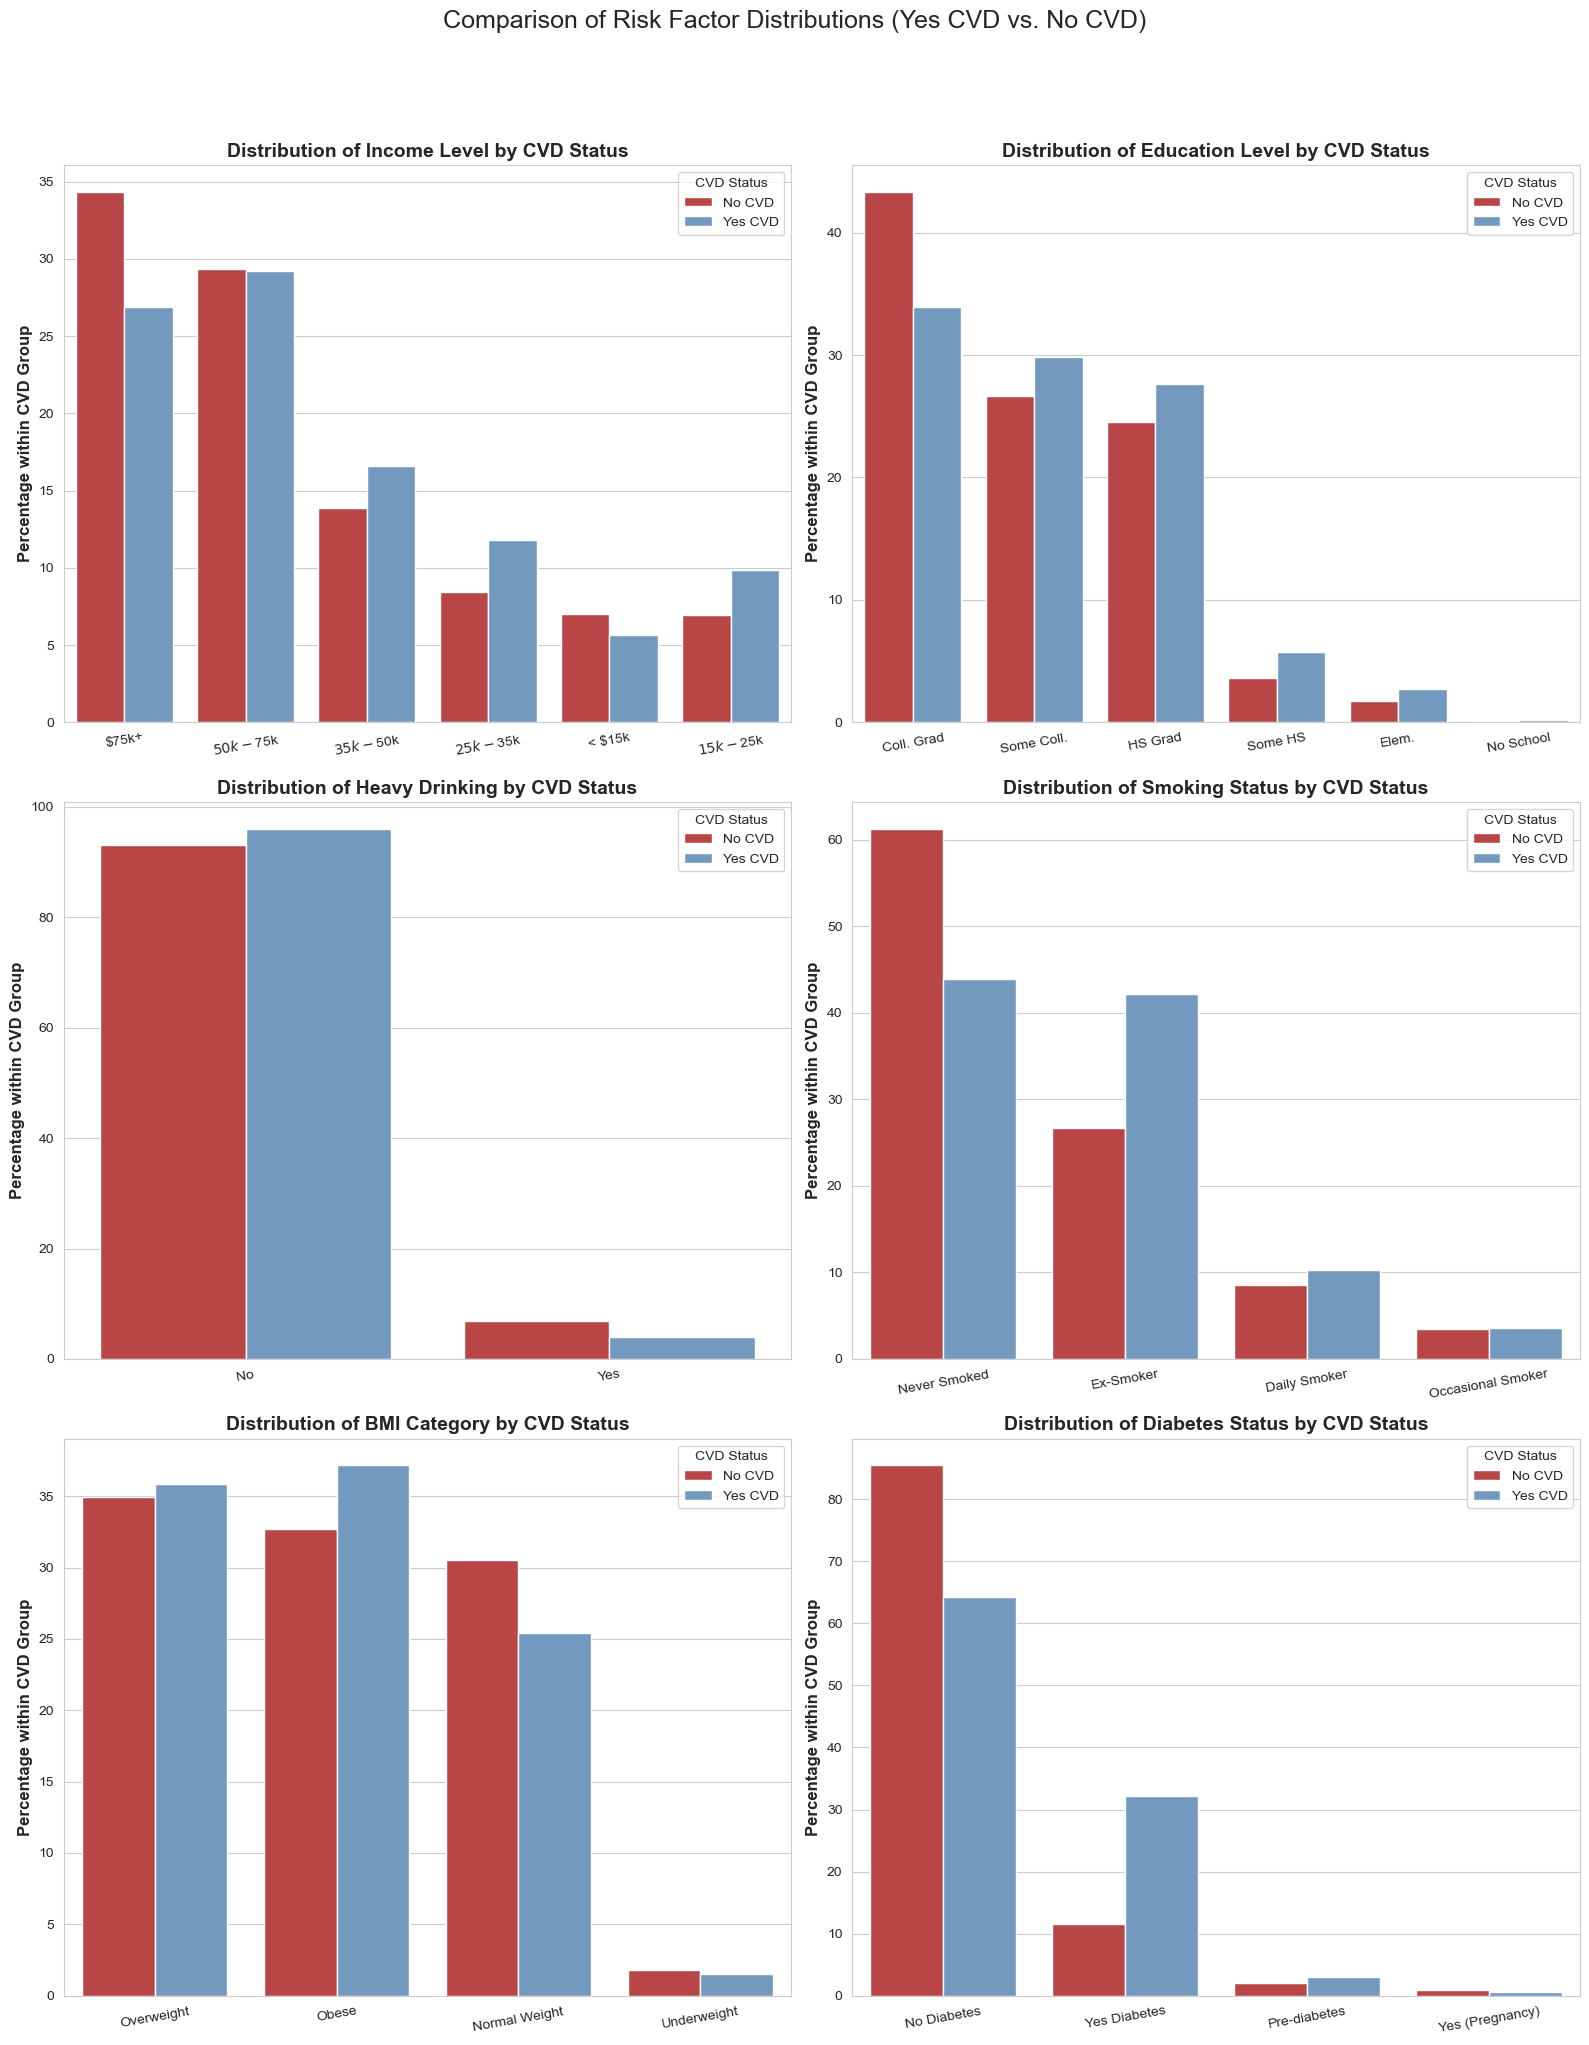

In [43]:
## 📊 Comparative Factor Distribution (Plots 1-6)
fig, axes = plt.subplots(3, 2, figsize=(16, 20))
axes = axes.flatten()

for i, var in enumerate(VARS_TO_PLOT):
    var_label = EN_LABEL_MAP.get(var, var)
    
    # Filter out missing values
    plot_data = df.loc[
        (df[var] != 'Missing') & (df[var] != 'Don\'t Know') & (df[var] != 'Refused') & 
        (df['CVD_ANY_LABEL'] != 'Missing')
    ]
    
    # Calculate proportions WITHIN each CVD group 
    grouped_props = plot_data.groupby('CVD_ANY_LABEL')[var].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
    
    sns.barplot(
        x=var, 
        y='Percentage', 
        hue='CVD_ANY_LABEL', 
        data=grouped_props, 
        ax=axes[i], 
        palette=COMPARISON_PALETTE,
        errorbar=None
    )
    
    axes[i].set_title(f'Distribution of {var_label} by CVD Status', fontsize=14)
    axes[i].set_ylabel('Percentage within CVD Group', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=10)
    axes[i].legend(title='CVD Status')

plt.suptitle('Comparison of Risk Factor Distributions (Yes CVD vs. No CVD)', fontsize=18, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_9856\3700778314.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var_to_group, y='Prevalence (%)', data=prevalence, ax=axes[i], errorbar=None, palette=current_palette)
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_9856\3700778314.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var_to_group, y='Prevalence (%)', data=prevalence, ax=axes[i], errorbar=None, palette=current_palette)
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_9856\3700778314.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.bar

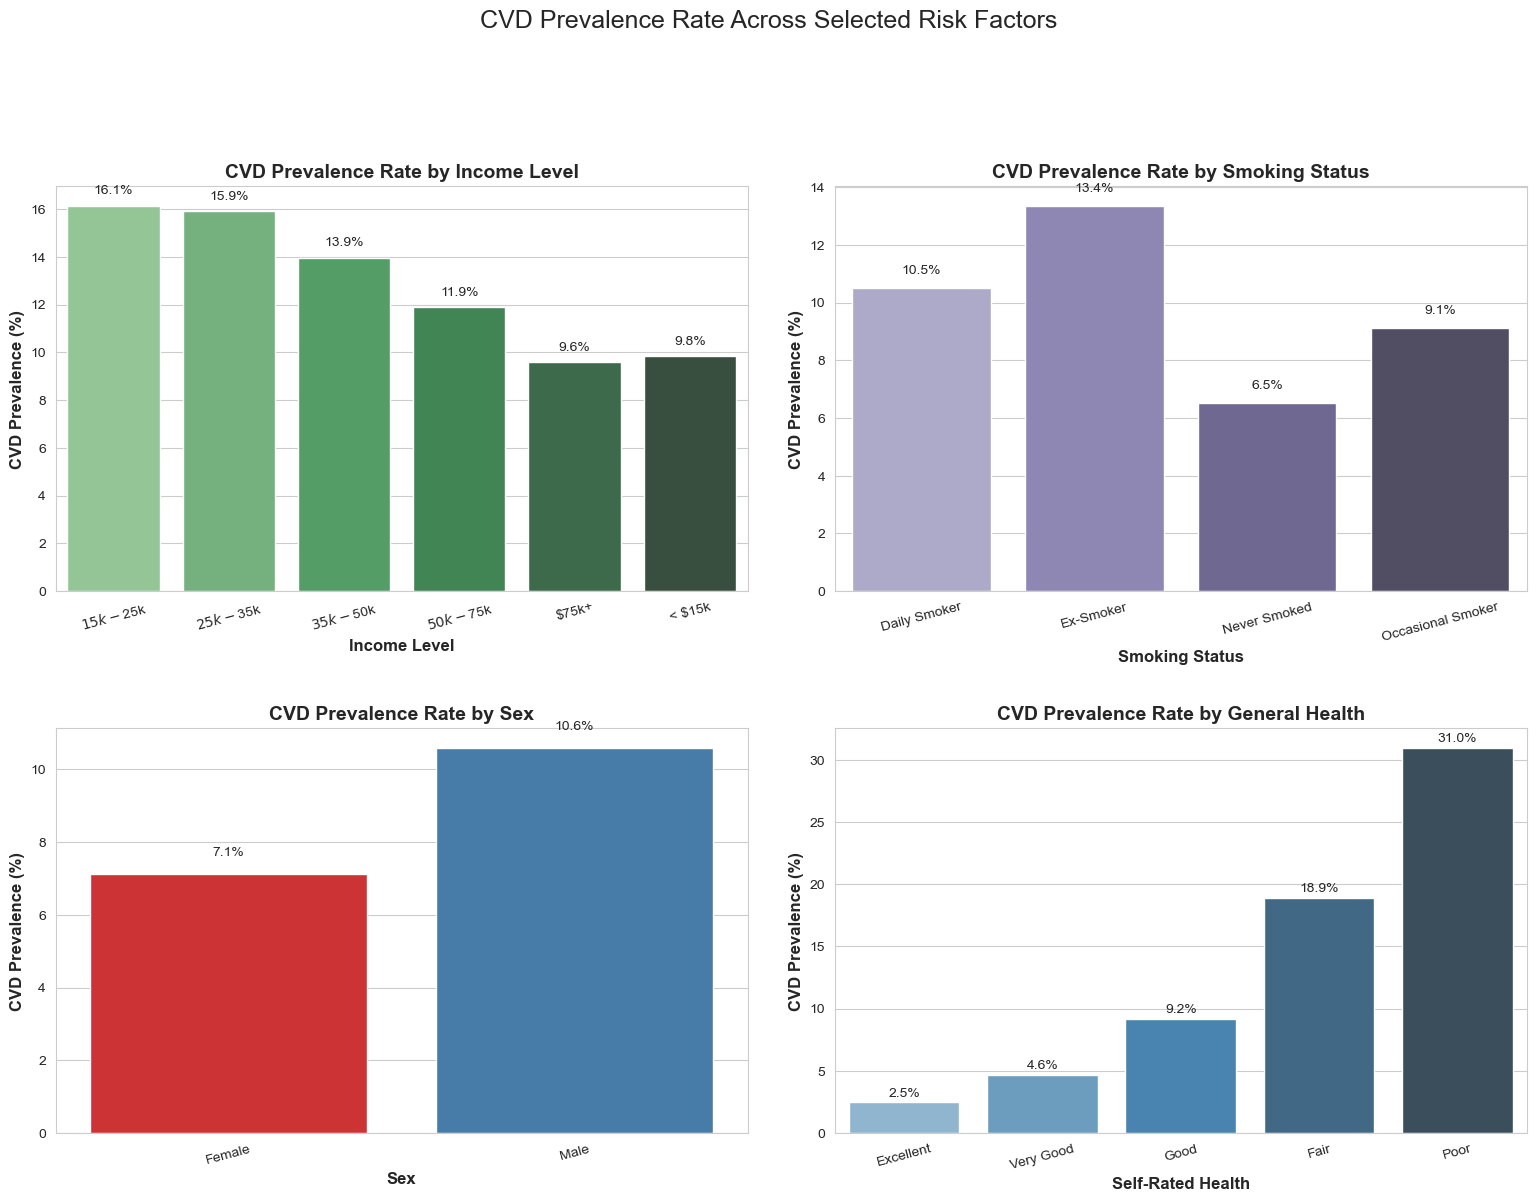

In [47]:
## 💔 CVD Prevalence Rate (Plots 7-10)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, var in enumerate(ECV_VARS):
    var_label = EN_LABEL_MAP.get(var, var)
    
    plot_data = df.loc[
        (df[var] != 'Missing') & (df[var] != 'Don\'t Know') & (df[var] != 'Refused') & 
        (df['CVD_ANY_LABEL'] != 'Missing')
    ]
    
    var_to_group = 'GENHLTH_LABEL' if var == 'GENHLTH' else var
    
    # Calculate Prevalence Rate
    prevalence = plot_data.groupby(var_to_group)['CVD_ANY_LABEL'].apply(lambda x: (x == 'Yes CVD').sum() / len(x) * 100).reset_index()
    prevalence.columns = [var_to_group, 'Prevalence (%)']
    
    if var == 'GENHLTH':
        order = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']
        prevalence[var_to_group] = pd.Categorical(prevalence[var_to_group], categories=order, ordered=True)
        prevalence = prevalence.sort_values(var_to_group)
    
    palette_name = PALETTES_CORRELATION[var]
    num_categories = len(prevalence[var_to_group].unique())
    current_palette = sns.color_palette(palette_name, num_categories)
    
    sns.barplot(x=var_to_group, y='Prevalence (%)', data=prevalence, ax=axes[i], errorbar=None, palette=current_palette)
    
    axes[i].set_title(f'CVD Prevalence Rate by {var_label}', fontsize=14)
    axes[i].set_ylabel('CVD Prevalence (%)', fontsize=12)
    axes[i].set_xlabel(var_label if var != 'GENHLTH' else 'Self-Rated Health')
    axes[i].tick_params(axis='x', rotation=15)
    
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].text(p.get_x() + p.get_width() / 2., height + 0.5,
                '{:1.1f}%'.format(height),
                ha="center", fontsize=10)

plt.suptitle('CVD Prevalence Rate Across Selected Risk Factors', fontsize=18, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98], pad=3.0)
plt.show()

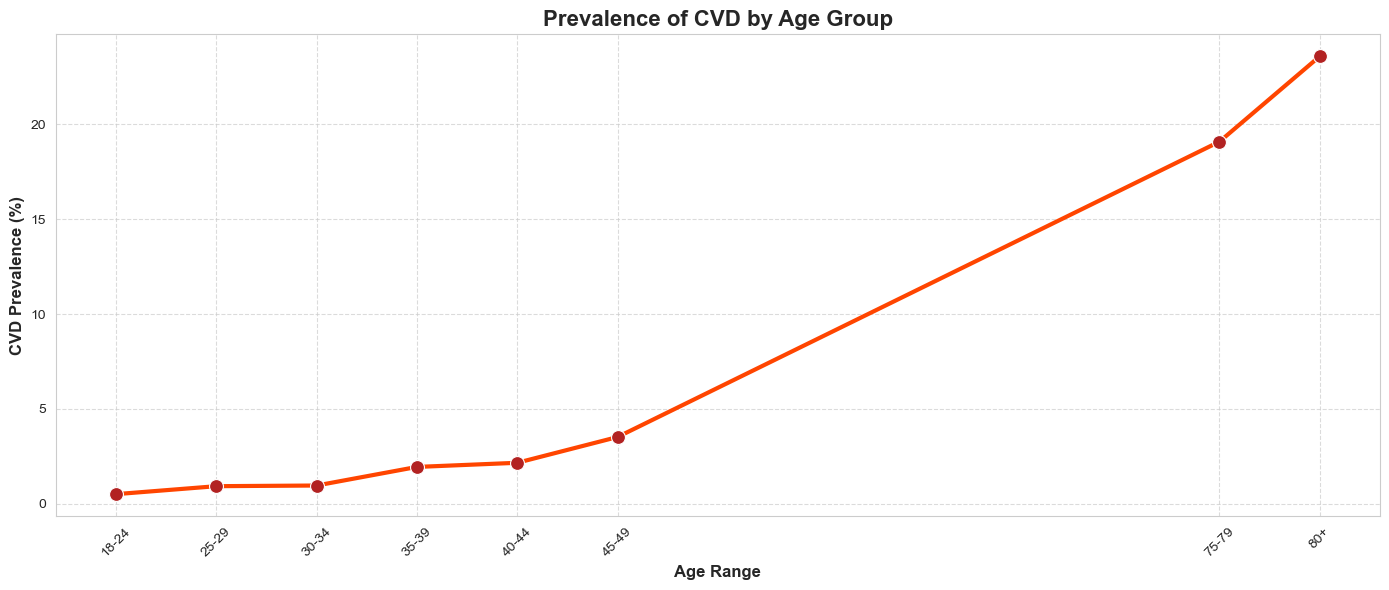

In [45]:
## 🎂 Age Trend Plot (Plot 11)

plt.figure(figsize=(14, 6))

age_prevalence = df.loc[(df['_AGEG5YR'] < 14)].groupby('_AGEG5YR')['CVD_ANY_LABEL'].apply(
    lambda x: (x == 'Yes CVD').sum() / len(x) * 100
).reset_index()
age_prevalence.columns = ['Age Group', 'Prevalence (%)']

sns.lineplot(x='Age Group', y='Prevalence (%)', data=age_prevalence, marker='o', color=LINE_COLOR, linewidth=3)
sns.scatterplot(x='Age Group', y='Prevalence (%)', data=age_prevalence, color="#B22222", s=100, zorder=5)

plt.title('Prevalence of CVD by Age Group', fontsize=16)
plt.ylabel('CVD Prevalence (%)', fontsize=12)
plt.xlabel('Age Range', fontsize=12)
plt.xticks(
    age_prevalence['Age Group'], 
    labels=[AGE_GROUP_MAP[g] for g in age_prevalence['Age Group']], 
    rotation=45,
    fontsize=10
)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


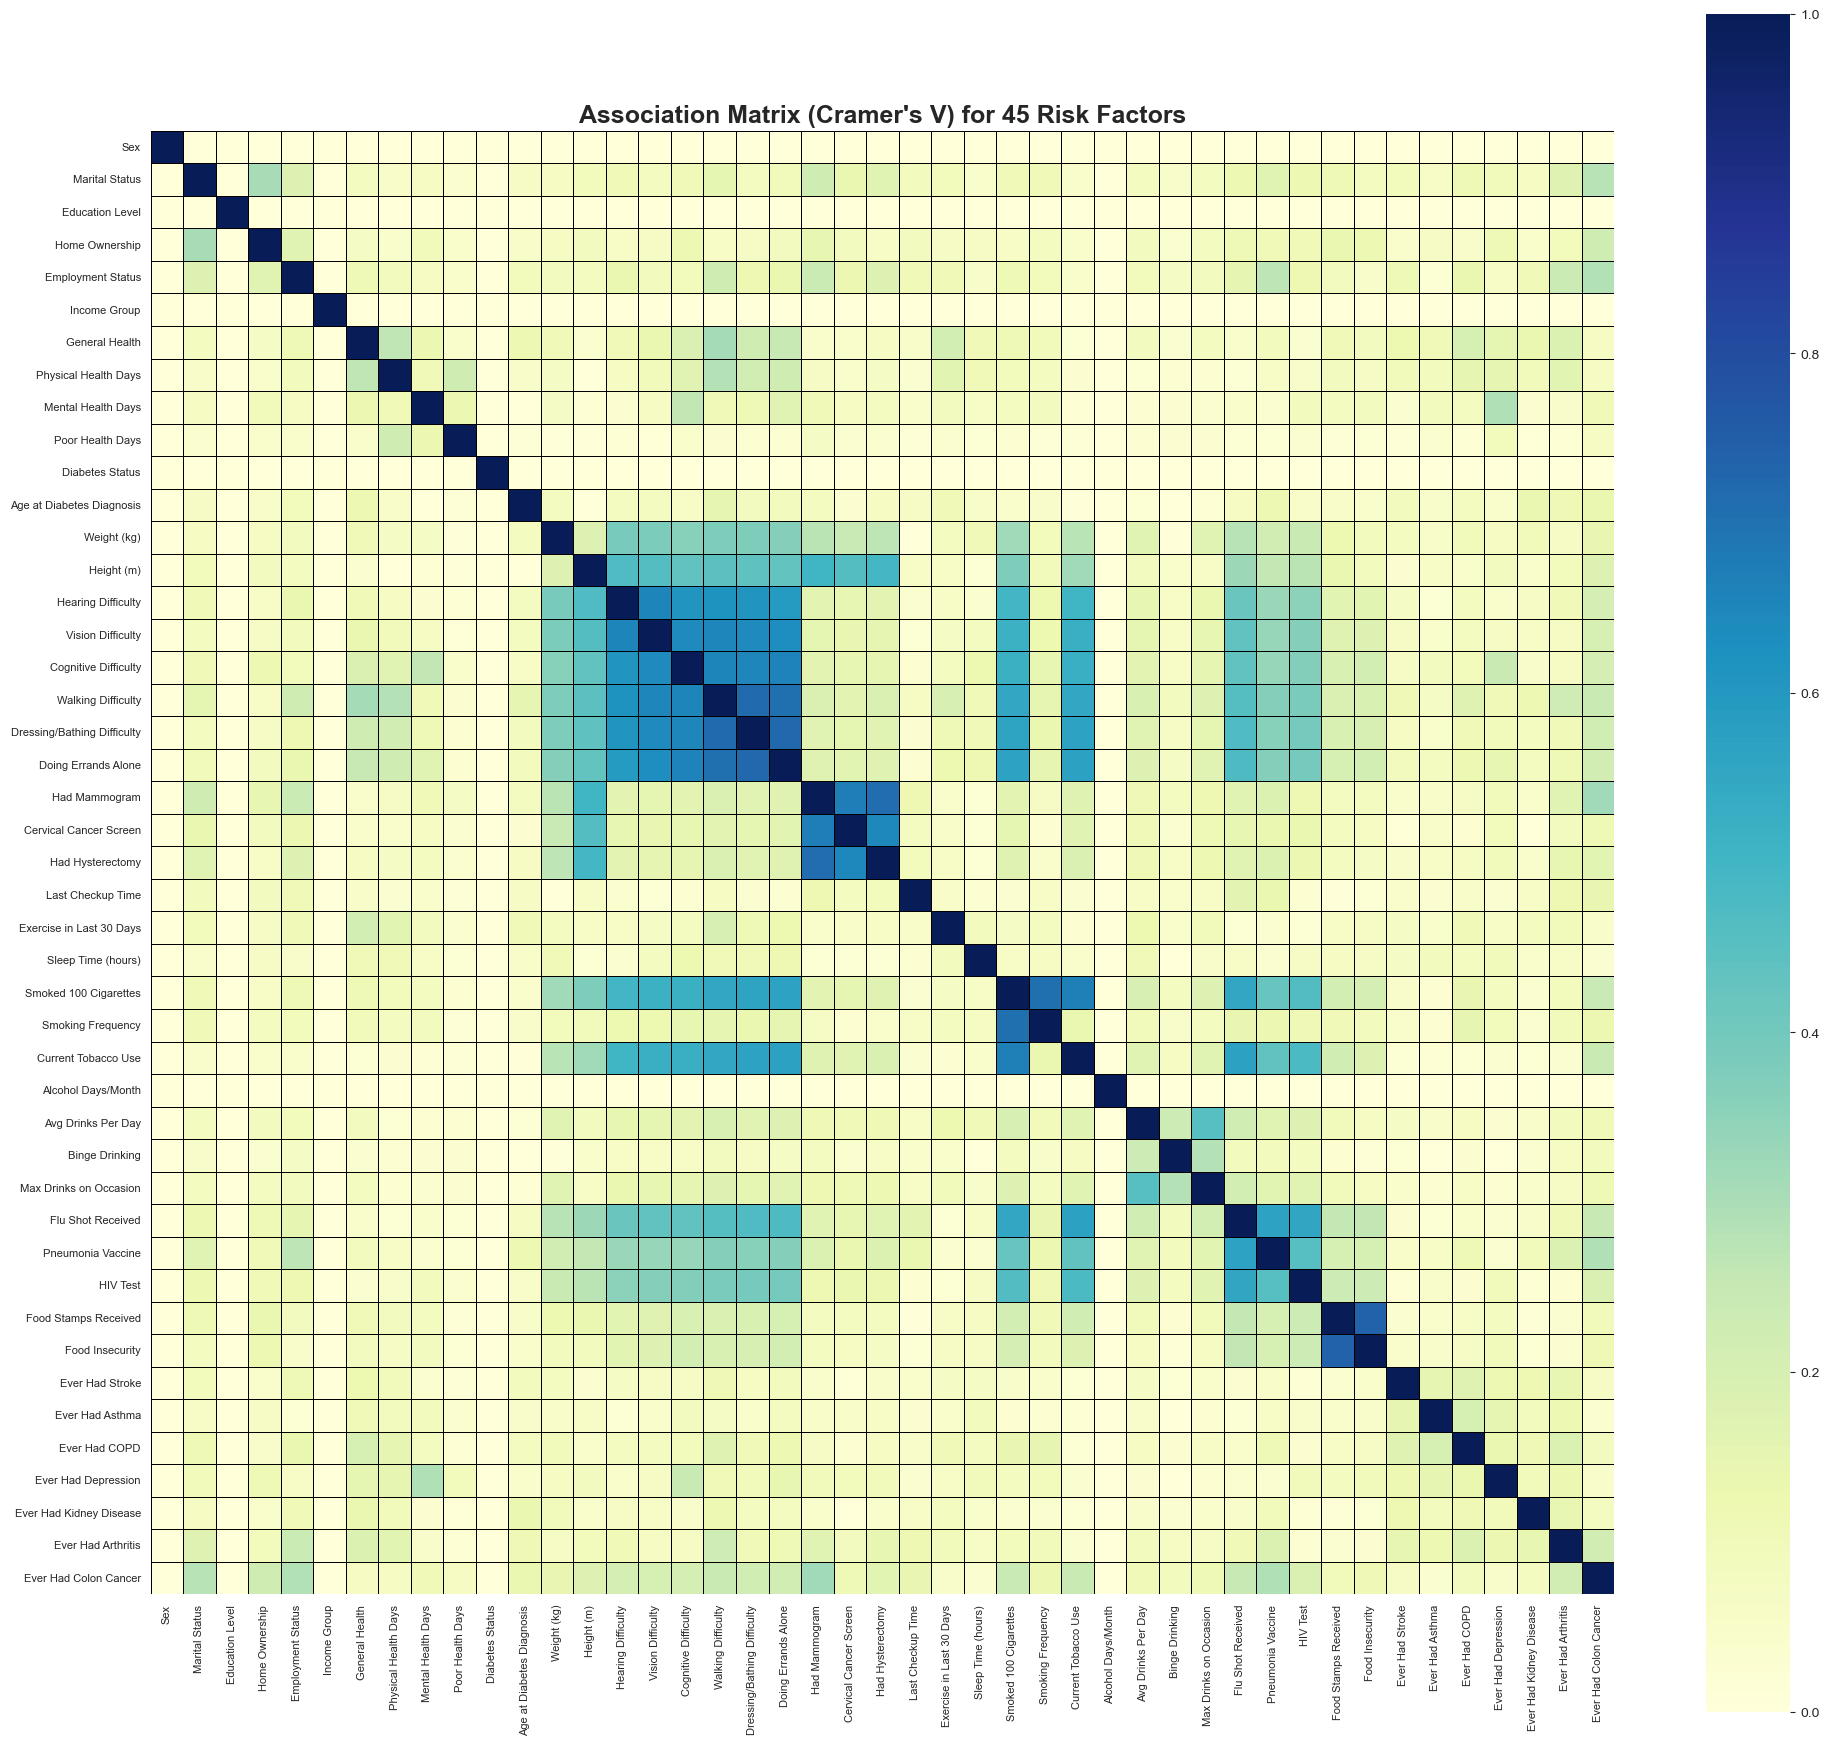

Association Matrix of 45x45 generated using Cramer's V.


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency 

# --- Association Calculation Functions (Required) ---
def cramers_v(x, y):
    """Calculate Cramer's V for two categorical variables."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    phi2 = chi2 / n
    # Bias correction
    phi2_corrected = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corrected = r - ((r-1)**2)/(n-1)
    k_corrected = k - ((k-1)**2)/(n-1)
    # Handle zero division
    min_denom = min(r_corrected - 1, k_corrected - 1)
    if min_denom <= 0:
        return 0.0 
    return np.sqrt(phi2_corrected / min_denom)

def calculate_correlation_matrix(data, categorical_features):
    """Calculates the association matrix using Cramer's V."""
    matrix = pd.DataFrame(index=categorical_features, columns=categorical_features)
    for i in range(len(categorical_features)):
        for j in range(i, len(categorical_features)):
            col1, col2 = categorical_features[i], categorical_features[j]
            v = 1.0 if col1 == col2 else cramers_v(data[col1], data[col2])
            matrix.loc[col1, col2] = v
            matrix.loc[col2, col1] = v
    return matrix.astype(float)

# =======================================================================================
## 6. Association Matrix (Cramer's V) - 45 Variables (FINAL CORRECTED CODE)
# =======================================================================================

# 1. Definition of the 45 features
FEATURES_45 = [
    'SEXVAR', 'MARITAL', 'EDUCA', 'RENTHOM1', 'EMPLOY1', 'INCOME3',
    'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'DIABETE4', 'DIABAGE4', 
    'WEIGHT2', 'HEIGHT3', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 
    'DIFFDRES', 'DIFFALON', 'HADMAM', 'CERVSCRN', 'HADHYST2',
    'CHECKUP1', 'EXERANY2', 'SLEPTIM1', 'SMOKE100', 'SMOKDAY2', 'USENOW3', 
    'ALCDAY4', 'AVEDRNK3', 'DRNK3GE5', 'MAXDRNKS', 'FLUSHOT7', 'PNEUVAC4', 
    'HIVTST7', 'FOODSTMP', 'SDHFOOD1',
    'CVDSTRK3', 'ASTHMA3', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'HAVARTH4', 
    'COLNCNCR'
]

# 2. Copy and Conversion to Integer (Fixes TypeError)
# NOTE: Assumes 'df' is loaded from your notebook's Block 2.
df_corr_45 = df[FEATURES_45].copy()

for col in FEATURES_45:
    try:
        # Convert to integer (Int64 handles NaN)
        df_corr_45[col] = pd.to_numeric(df_corr_45[col], errors='coerce').astype('Int64')
    except:
        pass


# 3. Cleaning Missing Values (Converts codes to NaN)
for col in FEATURES_45:
    if col not in ['DIABAGE4', 'WEIGHT2', 'HEIGHT3', 'AVEDRNK3', 'MAXDRNKS', 'SLEPTIM1', 'PHYSHLTH', 'MENTHLTH']:
        df_corr_45.loc[df_corr_45[col] >= 7, col] = np.nan 
        df_corr_45.loc[df_corr_45[col] == 77, col] = np.nan
        df_corr_45.loc[df_corr_45[col] == 99, col] = np.nan
    else:
        # Specific cleaning for numerical-like columns
        df_corr_45.loc[df_corr_45[col] >= 900, col] = np.nan 
        df_corr_45.loc[df_corr_45[col] == 77, col] = np.nan
        df_corr_45.loc[df_corr_45[col] == 99, col] = np.nan
        df_corr_45.loc[df_corr_45[col] == 777, col] = np.nan 
        df_corr_45.loc[df_corr_45[col] == 999, col] = np.nan
        
# 4. **IMPUTATION STRATEGY (SOLVES 'No data' ERROR)**
IMPUTATION_CODE = 9999 
df_corr_45 = df_corr_45.fillna(IMPUTATION_CODE)


# 5. Calculate the Matrix 
try:
    association_matrix_45 = calculate_correlation_matrix(df_corr_45, FEATURES_45)

    # 6. English Labels Mapping (New Descriptive Labels)
    ENGLISH_LABEL_MAP_45 = {
        'SEXVAR': 'Sex', 'MARITAL': 'Marital Status', 'EDUCA': 'Education Level', 
        'RENTHOM1': 'Home Ownership', 'EMPLOY1': 'Employment Status', 'INCOME3': 'Income Group',
        'GENHLTH': 'General Health', 'PHYSHLTH': 'Physical Health Days', 'MENTHLTH': 'Mental Health Days', 
        'POORHLTH': 'Poor Health Days', 'DIABETE4': 'Diabetes Status', 'DIABAGE4': 'Age at Diabetes Diagnosis', 
        'WEIGHT2': 'Weight (kg)', 'HEIGHT3': 'Height (m)', 'DEAF': 'Hearing Difficulty', 
        'BLIND': 'Vision Difficulty', 'DECIDE': 'Cognitive Difficulty', 'DIFFWALK': 'Walking Difficulty', 
        'DIFFDRES': 'Dressing/Bathing Difficulty', 'DIFFALON': 'Doing Errands Alone', 'HADMAM': 'Had Mammogram', 
        'CERVSCRN': 'Cervical Cancer Screen', 'HADHYST2': 'Had Hysterectomy', 'CHECKUP1': 'Last Checkup Time', 
        'EXERANY2': 'Exercise in Last 30 Days', 'SLEPTIM1': 'Sleep Time (hours)', 'SMOKE100': 'Smoked 100 Cigarettes', 
        'SMOKDAY2': 'Smoking Frequency', 'USENOW3': 'Current Tobacco Use', 'ALCDAY4': 'Alcohol Days/Month', 
        'AVEDRNK3': 'Avg Drinks Per Day', 'DRNK3GE5': 'Binge Drinking', 'MAXDRNKS': 'Max Drinks on Occasion', 
        'FLUSHOT7': 'Flu Shot Received', 'PNEUVAC4': 'Pneumonia Vaccine', 'HIVTST7': 'HIV Test', 
        'FOODSTMP': 'Food Stamps Received', 'SDHFOOD1': 'Food Insecurity', 'CVDSTRK3': 'Ever Had Stroke', 
        'ASTHMA3': 'Ever Had Asthma', 'CHCCOPD3': 'Ever Had COPD', 'ADDEPEV3': 'Ever Had Depression', 
        'CHCKDNY2': 'Ever Had Kidney Disease', 'HAVARTH4': 'Ever Had Arthritis', 'COLNCNCR': 'Ever Had Colon Cancer'
    }

    association_matrix_45.rename(columns=ENGLISH_LABEL_MAP_45, index=ENGLISH_LABEL_MAP_45, inplace=True)


    # 7. Visualization
    plt.figure(figsize=(20, 18))
    sns.heatmap(
        association_matrix_45, 
        fmt=".2f", 
        cmap='YlGnBu', 
        cbar=True,
        linewidths=.5,
        linecolor='black',
        square=True,
        vmin=0, 
        vmax=1 
    )

    plt.title('Association Matrix (Cramer\'s V) for 45 Risk Factors', fontsize=18)
    plt.xticks(rotation=90, ha='center', fontsize=8)
    plt.yticks(rotation=0, fontsize=8)
    plt.tight_layout()
    plt.show()

    print(f"Association Matrix of {len(FEATURES_45)}x{len(FEATURES_45)} generated using Cramer's V.")

except Exception as e:
    print(f"ERROR: Failed during Cramer's V calculation. Ensure 'df' was loaded correctly. Details: {e}")